# <span style="color:blue"> Exclusion-from-mzML notebook for IODA</span>

**Purpose**: The IODA exclusion-from-mzML notebook allows to generate exclusion lists for Iterative Optimise Data Acquisition (IODA) of fragmentation spectra in LC-MS.

**Usage**: This notebook requires the user to provide an mzML of a "blank" sample.  All the ions detected will be added to exclusion list. The IODA-exclusion workflow formats the ions for exclusion with XCalibur or [MaxQuant.Live]. If you need to generate an mzTab, we recommend using the dedicated [IODA exclusion-from-mzML notebook](IODA_exclusion_from_mzML.ipynb) using OpenMS. 

**Documentation**: Please refer to the [documentation page](link) for more informations on the for IODA exclusion-from-mzML worklow.

**Instructions**: Follow the instructions below and run the notebook cells accordingly.

### Step 0 - Run your LC-MS mass spectrometry experiment

Analyse your "blank" sample by LC-MS.

<span style="color:brown">**IMPORTANT**</span>: The chromatographic and mass spectrometry conditions must be identical for all the samples analyzed by IODA. Note that there is no need for MS/MS acquisition for the blank sample, as feature detection/alignment with OpenMS is performed only on the MS1 level. However, the following IODA-exclusion experiments requires MS/MS acquisition.


### Step 1 - Convert from .raw to .mzML file format

You can use the [GNPS Quickstart interface web-interface](https://gnps-quickstart.ucsd.edu/conversion) to convert your .raw file into .mzML file(s). The GNPS documentation provides [instructions](https://ccms-ucsd.github.io/GNPSDocumentation/fileconversion/) for converting MSConvert. Note that the spectra have to be centroided. The format must be mzML, and not mzXML. Download the converted file.

### Step 2 - Upload the mzML files

##### <span style="color:brown">Method 1 - Upload your mzML files</span>

Upload your mzML file on the Binder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon). 

##### <span style="color:brown">Method 2 - Web-sharing links</span>
We support retrieving the file from the following cloud sharing services:
> **Google Drive** : copy the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').

> **MassIVE/GNPS repository** : copy the link for each files.

### Step 3 - Specify the link or path to the mzML file
Specificy the filename or download link for the blank sample mzML in the cell below. The string for the link/path must be between parenthesis, such as: *"my_blank_sample.mzML"* or *"input_folder/my_blank_sample.mzML. 
You can use the following file for testing: "tests/PPL/20190701_PPLBlank_DOM_1.mzML"

<!--These are various test jobs 
#input_mzML = "https://raw.githubusercontent.com/lfnothias/IODA_MS/test2/tests/Euphorbia/exclusion/toppas_input/Blank.mzML"
#input_mzML = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
#input_mzML = "https://drive.google.com/file/d/11p2Jau2T-gCQb9KZExWdC7dy8AQWV__l/view?usp=sharing"
#input_mzML = "ftp://massive.ucsd.edu/MSV000083306/peak/QE_C18_mzML/QEC18_blank_SPE_20181227092326.mzML"
#input_mzML = "tests/PPL/exclusion/20190701_PPLBlank_DOM_1.mzML"
-->

In [13]:
input_mzML = "my_blank_sample.mzML"

### Step 4 - Run the OpenMS workflow

**Specify the variables of the OpenMS 
Feature Finder Metabolomics (FFM) tool**

Note that the OpenMS workflow uses two parallel FFM tools. One FFM is optimised for the detection of narrow LC-MS features/peaks, while the other FFM is optimised for large LC-MS features/peaks. Note that we used the peak height for LC-MS peaks/features intensity estimation (instead of area under the curve). Parameters should be optimised depending on the sample complexity and acquisition parameters.

##### Mass accuracy for FFM
> *ppm_error*: the maximum mass error allowed for the feature detection. Used in both FFM tools. A value of 10 ppm is recommended for a resolution of 35K or less (must be an integer/float).

##### Noise level for FFM
> *narrow_feature_noise*: this is the MS1 noise level for the detection of narrow LC-MS features. The default value is 1E5 (must be an integer/float, can be in scientific format).

> *large_feature_noise*: this is the MS1 noise level for the detection of large LC-MS features. The default value is 5E5 (must be an integer/float, can be in scientific format).

TIPS: If your sample has a lot of features, increase the noise levels to limit the number of ions that are detected for subsequent exclusion.

**Specify the variables in the cell below*

In [14]:
ppm_error = 10
narrow_feature_noise = 1E6
large_feature_noise = 5E5

In [15]:
from IODA_run_OpenMS_exclusion import *
IODA_exclusion_workflow(input_mzML,ppm_error,narrow_feature_noise,large_feature_noise)

[I 200716 05:30:30 IODA_run_OpenMS_exclusion:32] 2020-07-16 05:30:30.477900
[I 200716 05:30:30 IODA_run_OpenMS_exclusion:33] STARTING the IODA-exclusion WORKFLOW with OpenMS
[I 200716 05:30:30 IODA_run_OpenMS_exclusion:34] ======
[I 200716 05:30:30 IODA_run_OpenMS_exclusion:35] Getting the mzML, please wait ...
[I 200716 05:30:30 IODA_run_OpenMS_exclusion:63] This is the input file path: tests/PPL/exclusion/20190701_PPLBlank_DOM_1.mzML
[I 200716 05:30:30 IODA_run_OpenMS_exclusion:68] Copying the mzML to the OpenMS input folder. File will be renamed internally "Blank.mzML"
[I 200716 05:30:30 IODA_run_OpenMS_exclusion:71] ======
[I 200716 05:30:30 IODA_run_OpenMS_exclusion:72] Changing variables of the OpenMS workflow
[I 200716 05:30:30 IODA_run_OpenMS_exclusion:73]    ppm error = 10
[I 200716 05:30:30 IODA_run_OpenMS_exclusion:74]    narrow peak/feature noise threshold = 1000000.0
[I 200716 05:30:30 IODA_run_OpenMS_exclusion:75]    large peak/feature noise_threshold = 500000.0
[I 200716

### Step 5 - Download the results of the OpenMS workflow
- (Optional) Download the result files from
[download_results/IODA_exclusion_list_from_OpenMS.zip](download_results/IODA_exclusion_list_from_OpenMS.zip). You can examine the performance of OpenMS feature detection by visualizing the featureXML and mzML files with TOPPView. [See documentation here](documentation).

### Step 6 - Specify the parameters of the IODA-exclusion workflow
Specify the parameter values in the cell below:

*min_intensity*: the minimum intensity for the ion/feature to be retained in the exclusion list (absolute feature intensity).

*rt_exclusion_margin*: define the side margin for the retention time range exclusion. Note that this value is added to each side of the actual feature/ion retention time range. The units are seconds.

**Specify the variables for IODA-exclusion workflow in the cell below**

In [16]:
min_intensity = 100
rt_exclusion_margin = 5

### Step 7 - Run the IODA-targeted workflow

Simply run the cell below to start the IODA-exclusion workflow.

In [17]:
from IODA_exclusion_workflow import *
make_exclusion_from_mzTabs(min_intensity, rt_exclusion_margin)

[I 200716 05:30:33 IODA_exclusion_workflow:168] 2020-07-16 05:30:33.532862
[I 200716 05:30:33 IODA_exclusion_workflow:173] ======
[I 200716 05:30:33 IODA_exclusion_workflow:174] Starting the IODA-exclusion workflow
[I 200716 05:30:33 IODA_exclusion_workflow:175] This is the input: TOPPAS_Workflow/toppas_output//TOPPAS_out/mzTab_Narrow/Blank.mzTab
[I 200716 05:30:33 IODA_exclusion_workflow:176] This is the input: TOPPAS_Workflow/toppas_output//TOPPAS_out/mzTab_Large/Blank.mzTab
[I 200716 05:30:33 IODA_exclusion_workflow:177] ======
[I 200716 05:30:33 IODA_exclusion_workflow:178] Converting mzTab to table format
[I 200716 05:30:33 IODA_exclusion_workflow:179] For narrow features
[I 200716 05:30:33 IODA_exclusion_workflow:41] Filename(s) in the mzTab['Blank']
[I 200716 05:30:33 IODA_exclusion_workflow:181] For large features
[I 200716 05:30:33 IODA_exclusion_workflow:41] Filename(s) in the mzTab['Blank']
[I 200716 05:30:33 IODA_exclusion_workflow:183] ======
[I 200716 05:30:33 IODA_exclus

### Step 8 - Visualize the results

Run the cell below to view the scatter plot.

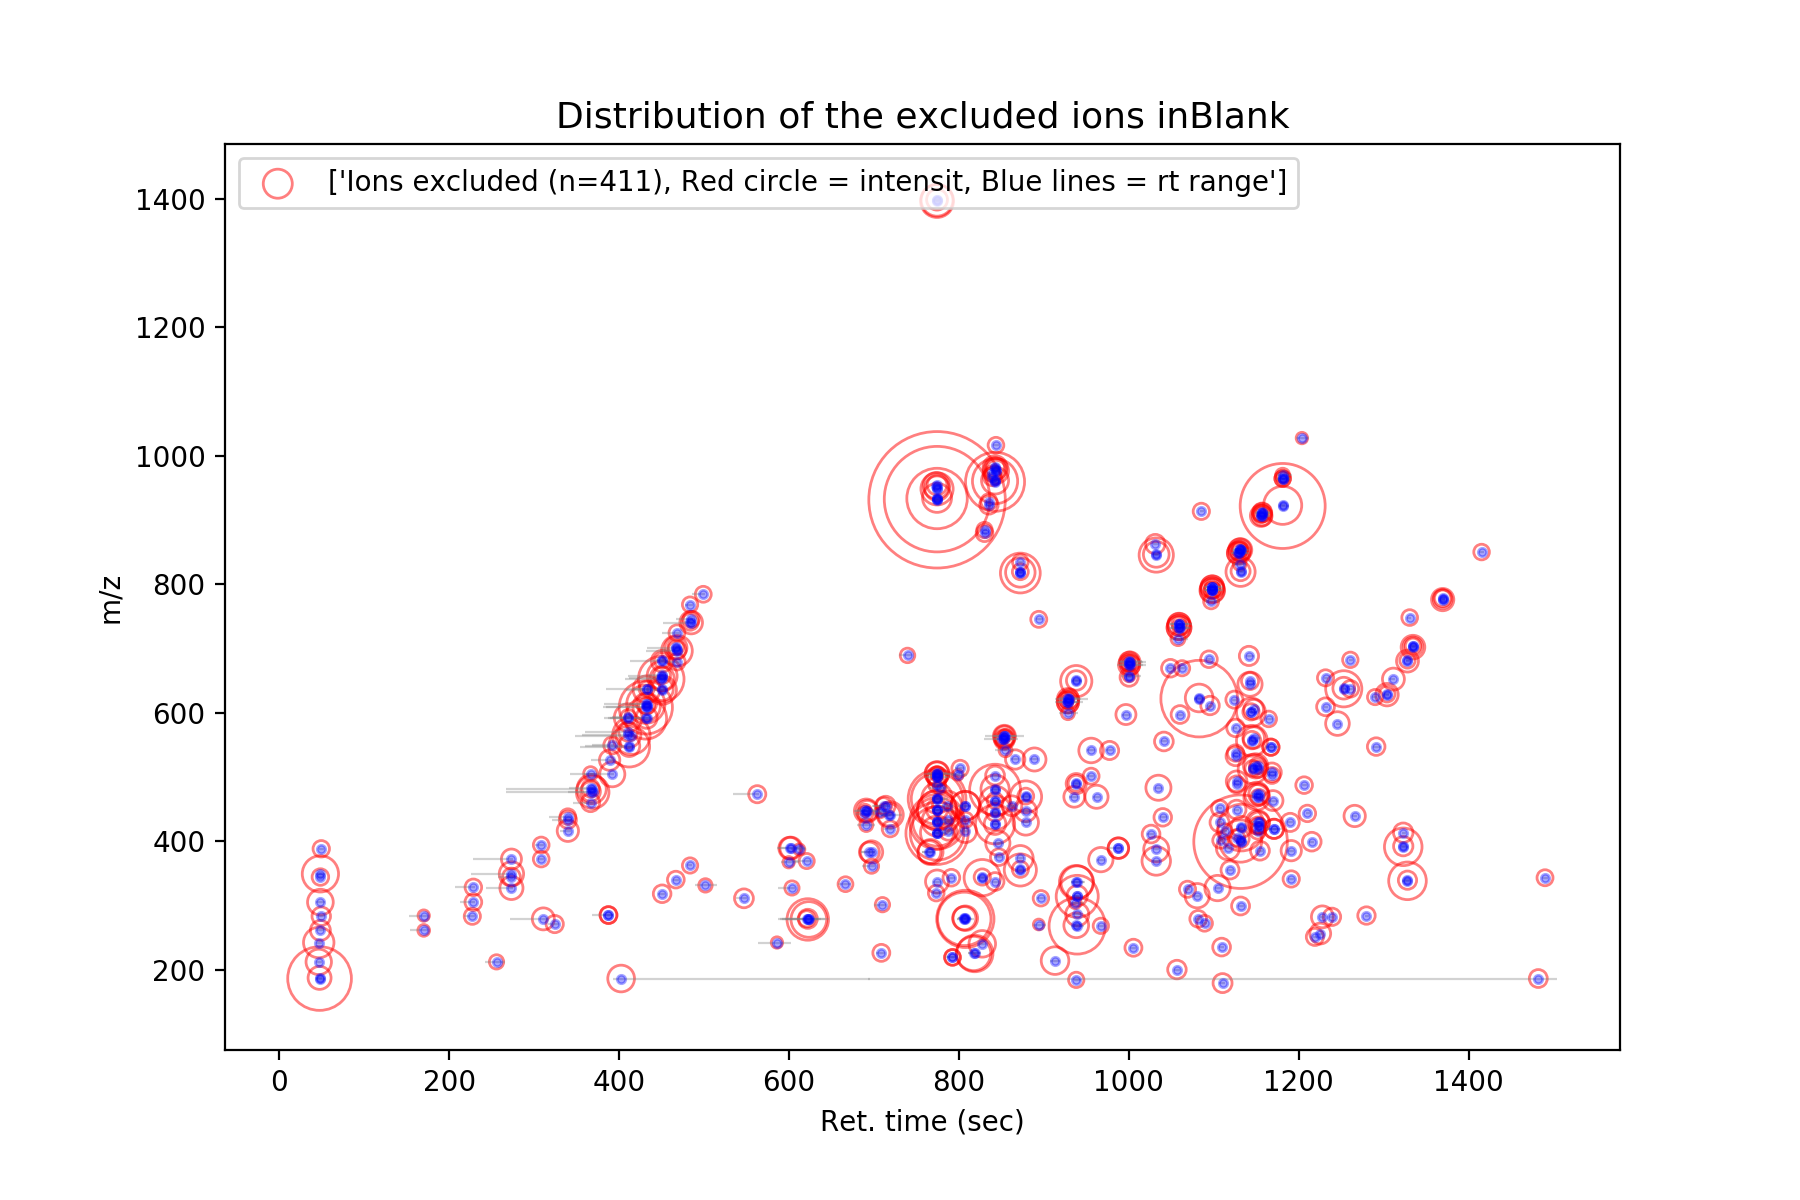

In [18]:
from IPython.display import Image
Image("results/plot_exclusion_RT_range_plot.png")

### Step 9 - Examine the results

**Visualise** : Run the cell below to show the scatter plot for the IODA-exclusion workflow results. Ion excluded in the blank sample are shown as scatter plot. Horizontal lines are indicating the retention time range for the ions/features excluded. 

- Examine the IODA-exclusion worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the mzTab file (such as with OpenMS).

### Step 10 - (Optional) Download the results

Download the IODA-exclusion Workflow results ->
[download-results/IODA_exclusion_results.zip](download-results/IODA_exclusion_results.zip?download=1).

(Optional) - Download the OpenMS results file -> 
[download_results/IODA_OpenMS_results.zip](download_results/IODA_OpenMS_results.zip?download=1). You can open the featureXML files with [OpenMS/TOPPView](https://github.com/OpenMS/OpenMS/releases) to inspect the quality of feature detection and alignment.

### Step 11 - Prepare your IODA experiment
Prepare the IODA experiment. For instructions on how to load and configure an target/inclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).